In [0]:
%tensorflow_version 2.x

In [0]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [53]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
trans = [
    "airplane",									
    "automobile",									
    "bird",										
    "cat",										
    "deer",										
    "dog",									
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

horse


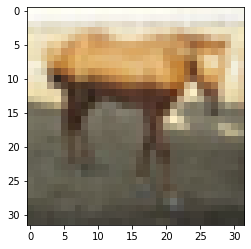

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 2000
print(trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

layers = [
    # 27(1 filter) * 64 + 64(bias) = 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 576(1 filter) * 128 + 128(bias) = 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers=layers)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)             

In [0]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [0]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [59]:
# 存模型: model.save("xxx.h5")
# 讀取模型: 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint("cnn.h5", save_best_only=True)
]
model.fit(x_train_norm,
          y_train,
          batch_size=200,
          epochs=100,
          validation_split=0.1,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
225/225 - 3s - loss: 1.6484 - accuracy: 0.3989 - val_loss: 1.2921 - val_accuracy: 0.5546
Epoch 2/100
225/225 - 3s - loss: 1.2311 - accuracy: 0.5625 - val_loss: 1.1328 - val_accuracy: 0.6060
Epoch 3/100
225/225 - 3s - loss: 1.0415 - accuracy: 0.6358 - val_loss: 0.9447 - val_accuracy: 0.6774
Epoch 4/100
225/225 - 3s - loss: 0.9100 - accuracy: 0.6825 - val_loss: 0.8277 - val_accuracy: 0.7152
Epoch 5/100
225/225 - 3s - loss: 0.8102 - accuracy: 0.7185 - val_loss: 0.7593 - val_accuracy: 0.7410
Epoch 6/100
225/225 - 3s - loss: 0.7342 - accuracy: 0.7463 - val_loss: 0.7134 - val_accuracy: 0.7558
Epoch 7/100
225/225 - 3s - loss: 0.6673 - accuracy: 0.7678 - val_loss: 0.7073 - val_accuracy: 0.7586
Epoch 8/100
225/225 - 2s - loss: 0.6059 - accuracy: 0.7878 - val_loss: 0.7393 - val_accuracy: 0.7492
Epoch 9/100
225/225 - 3s - loss: 0.5447 - accuracy: 0.8095 - val_loss: 0.6800 - val_accuracy: 0.7758
Epoch 10/100
225/225 - 2s - loss: 0.4828 - accuracy: 0.8324 - val_loss: 0.6835 - val_accura

In [60]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7233 - accuracy: 0.7606


[0.7233176827430725, 0.7605999708175659]

In [62]:
pre = model.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 8, 8, ..., 5, 1, 7])

In [64]:
print(pre.shape)
print(y_test.shape)
y_test_reshape = y_test.reshape(-1)
print(y_test_reshape.shape)

(10000,)
(10000, 1)
(10000,)


In [66]:
import pandas as pd
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_reshape, pre)
c = ["{}(預測)".format(i) for i in trans]
i = ["{}(真實)".format(i) for i in trans]
pd.DataFrame(mat, columns=c, index=i)

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(真實),800,8,37,21,19,11,2,10,61,31
automobile(真實),17,829,5,18,2,5,3,1,28,92
bird(真實),55,3,627,71,94,69,33,23,12,13
cat(真實),24,4,41,607,58,192,25,19,13,17
deer(真實),17,3,48,63,770,35,14,38,9,3
dog(真實),8,4,39,134,42,720,5,28,13,7
frog(真實),3,4,34,96,57,37,743,6,12,8
horse(真實),15,1,33,40,72,60,3,756,4,16
ship(真實),40,19,6,12,5,6,2,3,890,17
truck(真實),24,46,7,17,4,6,1,6,25,864


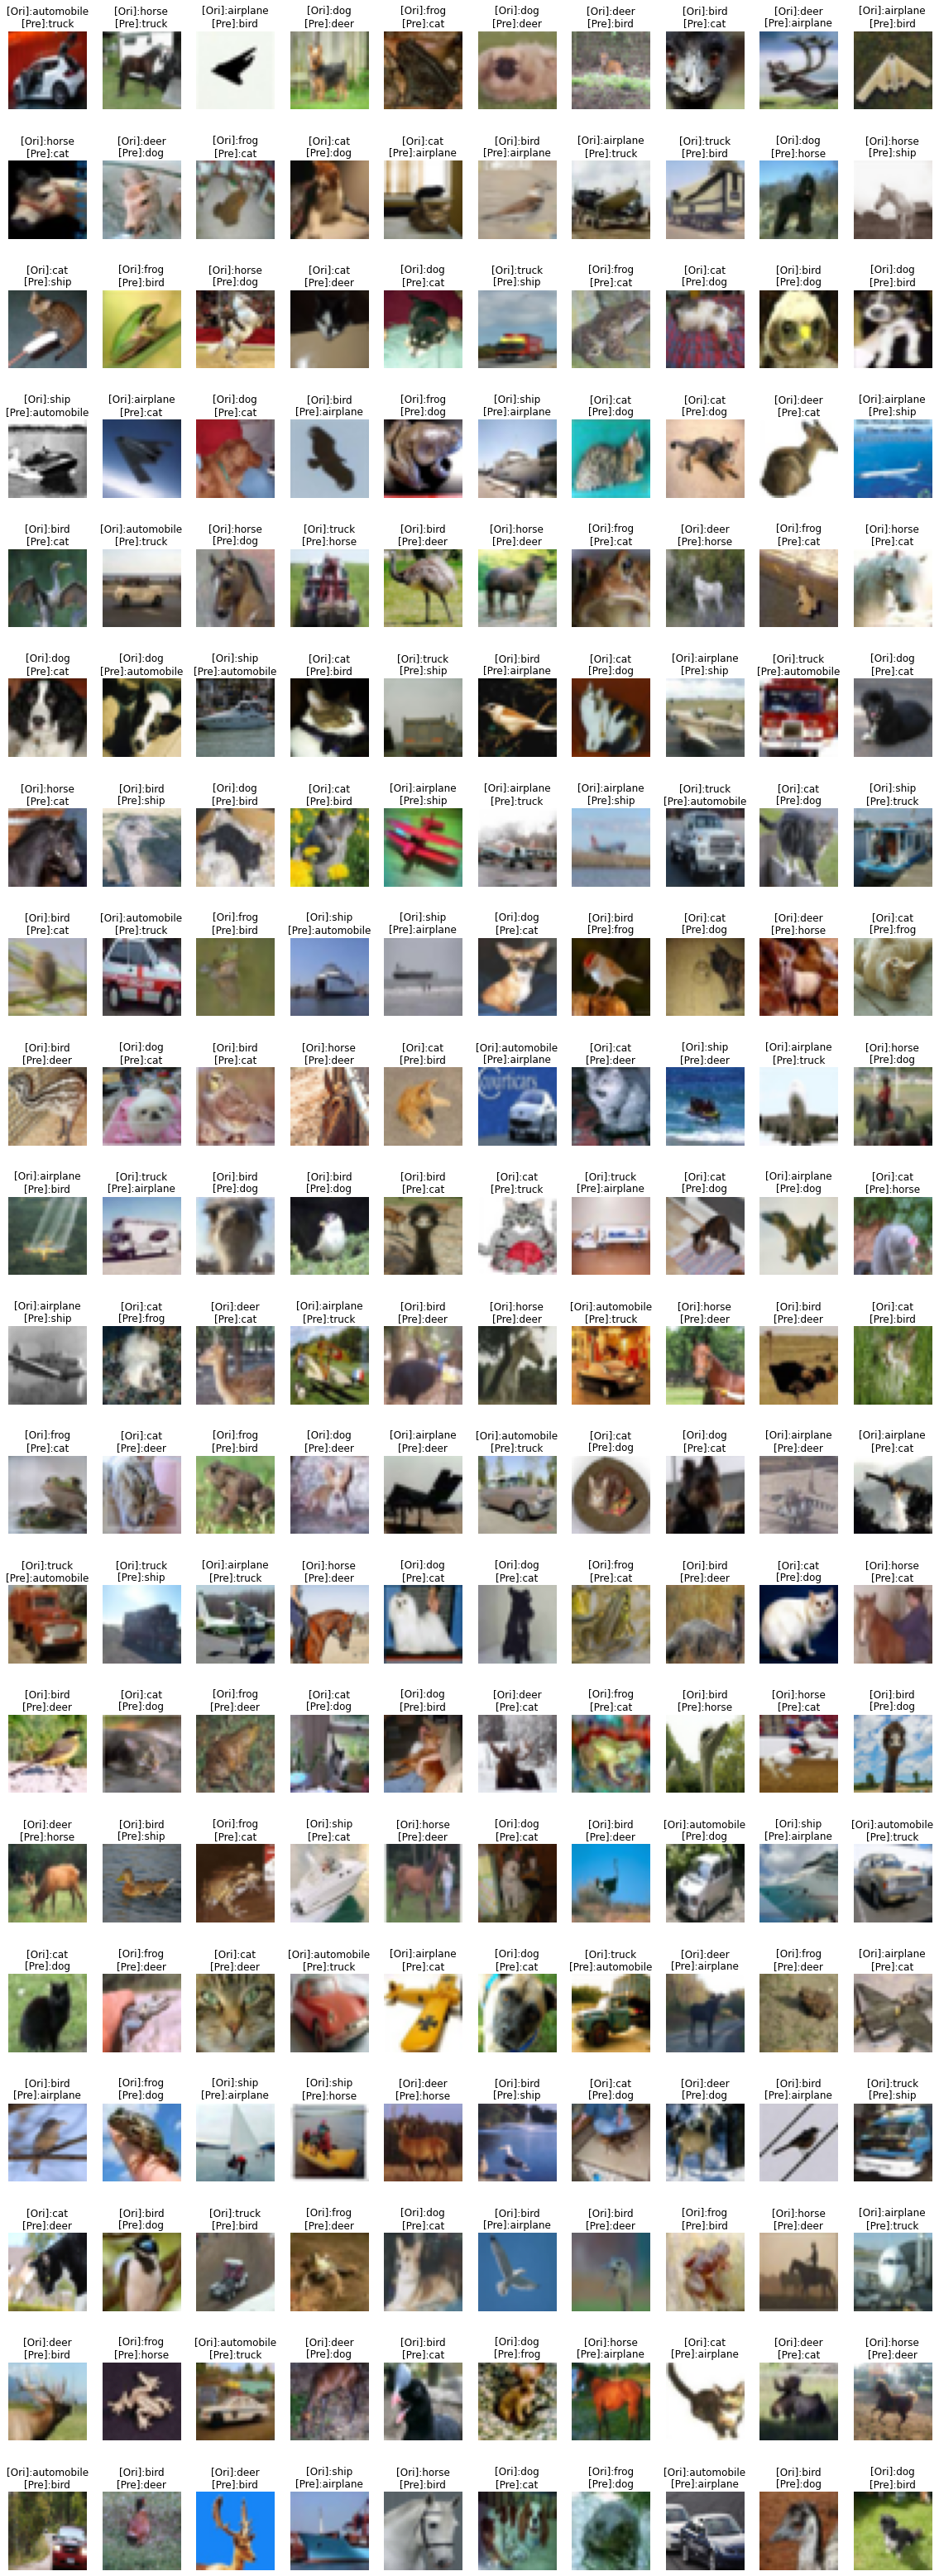

In [69]:
import numpy as np
# nonzero: 取出是True的index
# (x座標, y座標, z座標)
idx = np.nonzero(pre != y_test_reshape)[0]
idx = idx[:200]
# 預測錯誤的圖
false_img = x_test[idx]
false_answer = y_test_reshape[idx]
false_predict = pre[idx]

# 把圖變大一點才塞的下
plt.figure(figsize=(20, 60))
width = 10
height = len(false_img) // width + 1
for i, img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    plt.axis("off")
    t = "[Ori]:{}\n[Pre]:{}".format(trans[false_answer[i]],
                                    trans[false_predict[i]])
    plt.title(t)
    plt.imshow(img)

輸入檔名:test.png
應該是: airplane


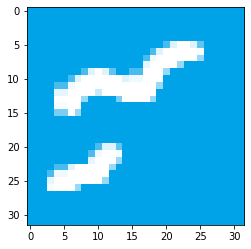

In [71]:
from tensorflow.keras.preprocessing.image import load_img
fn = input("輸入檔名:")
img = load_img(fn, target_size=(32, 32))
# 剛剛帶入 (10000, 784)
# 現在帶入 (1, 784)
img_norm = np.array(img).reshape(1, 32, 32, 3) / 255
ans = model.predict_classes(img_norm)[0]
print("應該是:", trans[ans])
plt.imshow(img)

In [72]:
# 讀取model
from tensorflow.keras.models import load_model
loaded = load_model("cnn.h5") 
# 讀取完以後 1. predict 2. fit(不用compile)
loaded.evaluate(x_test_norm, y_test)
# 如果你想看h5 https://support.hdfgroup.org/products/java/release/download.html

313/313 [==============================] - 1s 3ms/step - loss: 0.7233 - accuracy: 0.7606


[0.7233176827430725, 0.7605999708175659]